### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np
m = np.arange(12).reshape((3,4))
c_mean= np.mean(m, axis=0)
print("the column mean is ", c_mean,'\n')
r_mean= np.mean(m, axis=1)
print("the row mean is ", r_mean,'\n')
mean_all=np.mean(m)
print("the overall mean is ", mean_all,'\n')

the column mean is  [4. 5. 6. 7.] 

the row mean is  [1.5 5.5 9.5] 

the overall mean is  5.5 



2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#using outer in numpy
outer_np=np.outer(u,v)
print('The outer product is', outer_np,'\n')
#using a loop

M=np.zeros((len(u),len(v)))
for i in range(0,len(u)):
    for j in range(0,len(v)):
        M[i,j]=u[i]*v[j]
print(M,'\n')
#Using broadcasting operations
M1=np.zeros((len(u),len(v)))
for i in range(len(v)):
    M1[:,i]=u*v[i]
print(M1,'\n')


The outer product is [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]] 

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]] 



3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:

a=np.random.random((10,6))
print(a,'\n')
mask=np.any(a<0.1, axis=1)
print(mask,'\n')
a[mask]=0
print(a)


[[0.22442175 0.21790518 0.3845307  0.10857251 0.0135491  0.54389793]
 [0.11692111 0.00622505 0.54819107 0.50549333 0.78149033 0.38294445]
 [0.8229614  0.48983658 0.24709879 0.43931197 0.78608569 0.64123739]
 [0.53391883 0.1586694  0.24503321 0.19685909 0.59713917 0.32169909]
 [0.12404218 0.75192881 0.75665282 0.82954212 0.52827968 0.83908337]
 [0.28517365 0.89793449 0.19495956 0.78956912 0.03098622 0.69911985]
 [0.36506923 0.41544381 0.29759103 0.6745311  0.58319072 0.27411102]
 [0.71477024 0.75024388 0.59381595 0.04178594 0.35076503 0.16248238]
 [0.46558112 0.37197765 0.7512617  0.94328497 0.80598101 0.44348632]
 [0.86501168 0.1015579  0.66090141 0.98607869 0.08969454 0.1916976 ]] 

[ True  True False False False  True False  True False  True] 

[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.8229614  0.48983658 0.24709879 0.43931197 0.78608569 0.64123739]
 [0.53391883 0.1586694  0.24503321 0

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.03365503 0.0560823  0.07849545 0.01121928]
(array([12, 13, 61, 62], dtype=int64),)


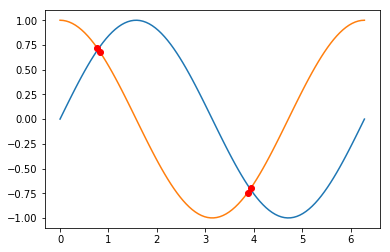

In [4]:
nb = np.linspace(0, 2*np.pi, 100)
#print(nb,'\n')
step10=nb[9::10]
#print(step10,'\n')
reversed_nb=nb[::-1]
#print(reversed_nb,'\n')

M=np.absolute(np.cos(nb)-np.sin(nb))
mask=(M<0.1)
el=M[mask]
print(el)

idx=np.where(M<0.1)
print(idx)

import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline
ys=np.sin(nb)
yc=np.cos(nb)
points=np.cos(nb[idx])
plt.plot(nb,ys)
plt.plot(nb,yc)
plt.plot(nb[idx],points,'ro')


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [10]:
M=np.zeros((10,10))
for i in range(10):
    for j in range (10):
        M[i,j]=(i+1)*(j+1)
t=np.matrix.trace(M)
print('Trace:',t,'\n')
d=np.diag(M[::-1])
print('antiDiagonal',d)
d1=np.diag(M,k=1)
print('diagonal offset by 1',d1)


Trace: 385.0 

antiDiagonal [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
diagonal offset by 1 [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
cities = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 
'Albuquerque', 'Flagstaff', 'Los Angeles'])
dist=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]).reshape((-1,1))
TDgrid_mile = abs(dist - dist.T)
print('2D distance grid in mile \n',TDgrid_mile,'\n')
TDgrid_km=TDgrid_mile*1.60934
print('2D distance grid in km \n',TDgrid_km)

2D distance grid in mile 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

2D distance grid in km 
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [11]:
from math import sqrt
N=100

def prime_num(N):
    mask=np.ones((N,),dtype=bool)
    mask[0]=False
    mask[1]=False
    for i in range(N):
        if mask[i]==True:
            for j in range(2*i,N,i):
                mask[j]=False
    L=np.where(mask)[0]
    return L
print(prime_num(N))


def prime_sieve(N):
    mask=np.ones((N,),dtype=bool)
    mask[0]=False
    mask[1]=False
    for i in range(int(sqrt(N))):
        if mask[i]==True:
            for j in range(i**2,N,i):
                mask[j]=False
    L=np.where(mask)[0]
    return(L)

%timeit prime_num(N) 
%timeit prime_sieve(N) 
%timeit  prime_num(10*N) 
%timeit prime_sieve(10*N) 
%timeit  prime_num(100*N)
%timeit prime_sieve(100*N)
%timeit  prime_num(1000*N)
%timeit prime_sieve(1000*N)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
150 µs ± 8.91 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
27.5 µs ± 2.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.46 ms ± 63.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
184 µs ± 2.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14.4 ms ± 293 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.01 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
152 ms ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.7 ms ± 4.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [8]:
M=np.random.randint(-1,1,size=(1000,200))

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

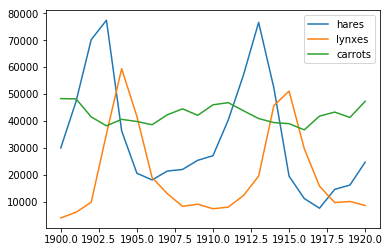

Hares: DescribeResult(nobs=21, minmax=(7600.0, 77400.0), mean=34080.95238095238, variance=458558619.04761904, skewness=0.8707926603586706, kurtosis=-0.4713852285780282) 

Lynxes: DescribeResult(nobs=21, minmax=(4000.0, 59400.0), mean=20166.666666666668, variance=277422333.3333333, skewness=1.122094055331874, kurtosis=-0.11206718692648243) 

Carrots: DescribeResult(nobs=21, minmax=(36700.0, 48300.0), mean=42400.0, variance=11591000.0, skewness=0.328696845915367, kurtosis=-0.9133000711768431) 



In [9]:
from scipy import stats
matr = np.loadtxt('populations.txt')
year = matr[:,0]
hares = matr[:,1]
lynxes = matr[:,2]
carrots = matr[:,3]

plt.plot(year, hares, label='hares')
plt.plot(year, lynxes, label='lynxes')
plt.plot(year, carrots, label='carrots')
plt.legend()
plt.show()

print("Hares:", stats.describe(hares), '\n')
print("Lynxes:", stats.describe(lynxes),'\n')
print("Carrots:", stats.describe(carrots),'\n')